In [1]:
# cca --- > complete case analysis

# df --- > missing data --- > filter missing data
# new_df = filtered_columns_in_which_we_have_missing_data

# new_df -- > missing_data_drop

# Architecture
# past column in which we have missing data
# updated column in which we have no missing data

# if past data architecture is overlap to new data architecture --- >
# it means we can drop missing data .
# if past data architecture is not overlap to new data architecture --- >
# it means we can not drop missing data . we will fill missing data .

In [2]:
import numpy as np
import pandas as pd

In [3]:
df=pd.read_csv("/content/dsjob - dsjob.csv")

In [4]:
df.head(2)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,32403,city_41,0.827,Male,Has relevent experience,Full time course,Graduate,STEM,9,<10,NaN,1,21
1,9858,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,5,NaN,Pvt Ltd,1,98


In [5]:
df.isnull().mean()*100

,0
enrollee_id,0.000000
city,0.000000
city_development_index,0.000000
gender,23.860968
relevent_experience,0.000000
enrolled_university,1.456083
education_level,2.442461
major_discipline,14.654767
experience,0.234852
company_size,29.215594


In [6]:
cols = [var for var in df.columns if df[var].isnull().mean() <0.05 and df[var].isnull().mean() > 0]
cols

['enrolled_university', 'education_level', 'experience', 'last_new_job']

In [8]:
df[cols].sample(5)

,enrolled_university,education_level,experience,last_new_job
2062,no_enrollment,Graduate,12,1
415,no_enrollment,Graduate,13,2
150,no_enrollment,Masters,>20,>4
1743,no_enrollment,Graduate,10,4
47,no_enrollment,Masters,6,1


In [9]:
df['education_level'].value_counts()

,count
education_level,
Graduate,1269
Masters,496
High School,222
Phd,54
Primary School,36


In [10]:
len(df[cols].dropna())/len(df)

0.9478628464067638

In [12]:
new_df=df[cols].dropna()
df.shape,new_df.shape

((2129, 13), (2018, 4))

In [13]:
import matplotlib.pyplot as plt

<Axes: >

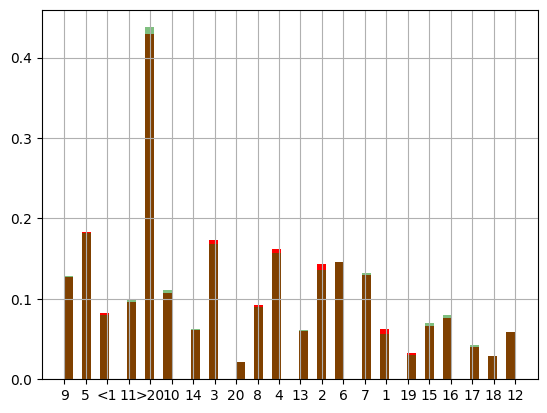

In [16]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df['experience'].hist(bins=50, ax=ax, density=True, color='red' )

# data after cca, the argument alpha makes the color transparent, so we can
# see the overlay of the 2 distributions
new_df['experience'].hist(bins=50, ax=ax, color='green', density=True, alpha=0.5)
